In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [154]:
coffee_production = pd.read_csv("../data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [155]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [156]:
axes_settings = {}

plt.rc("axes", **axes_settings)

### Data Prep

In [157]:
brazil_vs_others = coffee_production['Brazil']
brazil_vs_others = pd.DataFrame(brazil_vs_others)
all = 0
for i in coffee_production.columns:
    all += coffee_production[i]
brazil_vs_others['rest_of_world'] = all-coffee_production['Brazil']
brazil_vs_others.head()

,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.047,65121.147


In [158]:
brazil_vs_others['Brazil'] = pd.to_numeric(brazil_vs_others['Brazil'], errors='coerce')
brazil_vs_others['rest_of_world'] = pd.to_numeric(brazil_vs_others['rest_of_world'], errors='coerce')

In [159]:
coffee_production_top5_2018 = pd.DataFrame(coffee_production.T['2018']).sort_values(by='2018',ascending=False)
other = 0
skip = 0
for i in coffee_production_top5_2018['2018']:
    if skip < 5:
        skip += 1
        continue
    other += i
coffee_production_top5_2018 = coffee_production_top5_2018.head().T
coffee_production_top5_2018['Rest of World'] = other
coffee_production_top5_2018 = coffee_production_top5_2018.T
coffee_production_top5_2018

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


### Meshgrid Layout

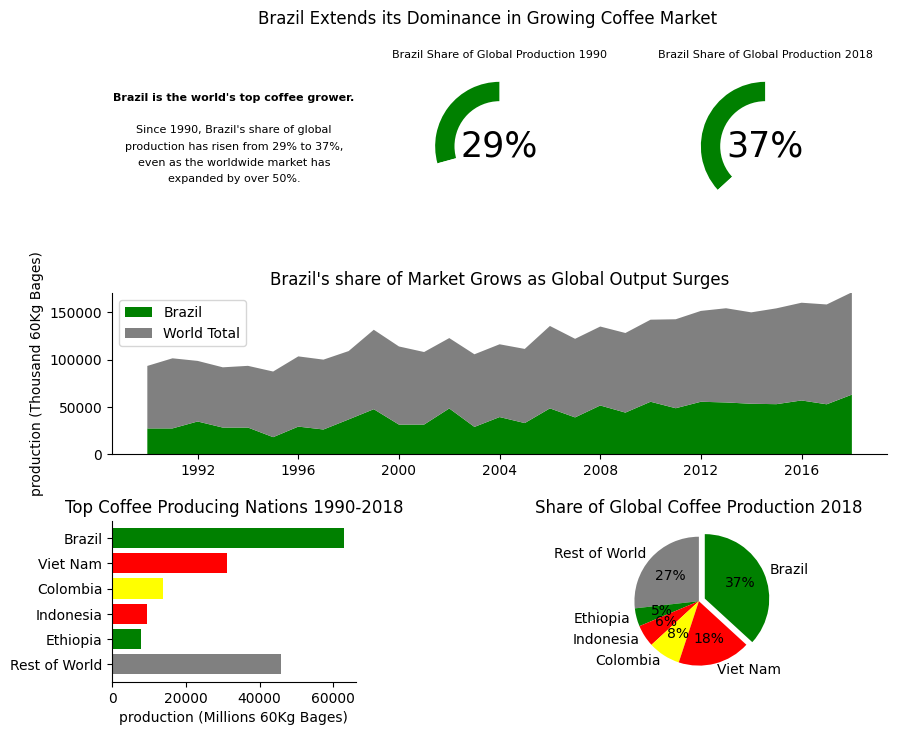

In [179]:
import matplotlib.gridspec as gridSpec
gs = gridSpec.GridSpec(ncols=6, nrows=11)
fig = plt.figure(figsize=(10,8))
fig.suptitle(
    "Brazil Extends its Dominance in Growing Coffee Market",
    y = .95
)
ax1 = fig.add_subplot(gs[:3,:2])
ax2 = fig.add_subplot(gs[:3,2:4])
ax3 = fig.add_subplot(gs[:3,4:])
ax4 = fig.add_subplot(gs[4:7,:])
ax5 = fig.add_subplot(gs[8:,:2])
ax6 = fig.add_subplot(gs[8:,3:])

ax1.text(0.5, 0.8, "Brazil is the world's top coffee grower.", fontsize=8, ha='center', va='center', weight='bold')
ax1.text(0.5, 0.6, "Since 1990, Brazil's share of global", fontsize=8, ha='center', va='center')
ax1.text(0.5, 0.5, "production has risen from 29% to 37%,", fontsize=8, ha='center', va='center')
ax1.text(0.5, 0.4, "even as the worldwide market has", fontsize=8, ha='center', va='center')
ax1.text(0.5, 0.3, "expanded by over 50%.", fontsize=8, ha='center', va='center')
ax1.axis('off')

ax2.pie(
    brazil_vs_others.T['1990'],
    startangle=90,
    colors=['green','white']
)

hole = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(hole)
ax2.text(
    0, 
    0, 
    "29%", 
    ha='center', 
    va='center', 
    fontsize=25
)
ax2.set_title('Brazil Share of Global Production 1990',fontsize=8) 
# ax3
ax3.pie(
    brazil_vs_others.T['2018'],
    startangle=90,
    colors=['green','white']
)
hole2 = plt.Circle((0, 0), 0.70, fc='white')
ax3.add_artist(hole2)
ax3.text(
    0, 
    0, 
    "37%", 
    ha='center', 
    va='center', 
    fontsize=25
)
ax3.set_title('Brazil Share of Global Production 2018',fontsize = 8)
# ax4
ax4.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    colors =['green','gray']
)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_ylim(0,170000)
ax4.set_xticks(brazil_vs_others.index[2::4])
ax4.legend(['Brazil','World Total'], loc = 'upper left')
ax4.set_ylabel("production (Thousand 60Kg Bages)")
ax4.set_title("Brazil's share of Market Grows as Global Output Surges")

# ax5
ax5.barh(
    coffee_production_top5_2018.index[::-1],
    coffee_production_top5_2018['2018'].iloc[::-1],
    color =['green','red','yellow','red','green','gray'][::-1]
)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_title("Top Coffee Producing Nations 1990-2018")
ax5.set_xlabel("production (Millions 60Kg Bages)")
#ax6
ax6.pie(
    coffee_production_top5_2018['2018'].iloc[::-1],
    labels=coffee_production_top5_2018.index[::-1],
    autopct='%.0f%%',
    explode=(0, 0, 0, 0, 0, 0.1),
    startangle=90,
    colors =['green','red','yellow','red','green','gray'][::-1]
)
ax6.set_title("Share of Global Coffee Production 2018")
plt.savefig("Coffee Market.png",dpi = 1200)

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [163]:
prices_paid_to_growers = pd.read_csv("../data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [164]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


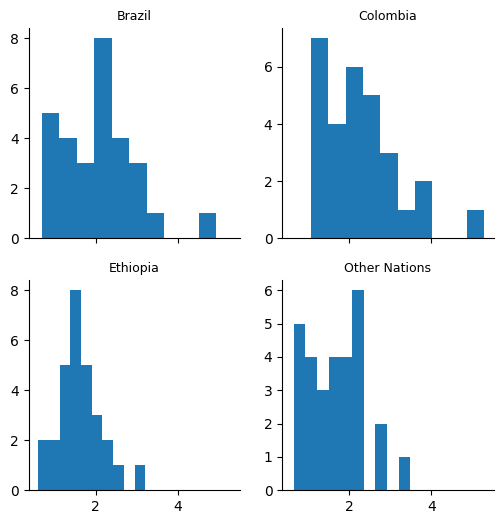

In [178]:
fig ,ax = plt.subplots(2,2,figsize=(6,6), sharex='all')
ax[0][0].hist(
    prices_paid_to_growers['Brazil']
)
ax[0][0].set_title("Brazil" ,fontsize=9)
ax[0][1].hist(
    prices_paid_to_growers['Colombia']
)
ax[0][1].set_title("Colombia" ,fontsize=9)
ax[1][0].hist(
    prices_paid_to_growers['Ethiopia']
)
ax[1][0].set_title("Ethiopia" ,fontsize=9)
ax[1][1].hist(
    prices_paid_to_growers['Other Nations']
)
ax[1][1].set_title("Other Nations" ,fontsize=9)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)